<a href="https://colab.research.google.com/github/mathdeoliveira/Portfolio_DataScience/blob/master/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://i.imgur.com/8BSKELK.jpg" width="60%"></p>
<p align=center>
<a href="http://www.freepik.com">Designed by Freepik</a></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [1]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
file = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file)
df.head(3)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


## Análise Exploratória

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

#### Qual o resumo estatístico das colunas?

In [3]:
# comando para resumo estatístico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Com o resumo acima podemos perceber que as colunas de `V1` até `V28` não tem uma grande discrepância, e a coluna `Time` também não.

Vamos analisar a coluna `Amount`, que é a quantidade do valor da transação. Temos que o valor médio das transações foram de 88.34, um valor máximo de 25691.16 e a maioria das transações tiveram um valor pequeno, o que se é esperado por causa do valor da média. Tudo isso considerando tanto as transações legítimas`(0)` como também as fraudulentas`(1)`.

#### Existe dados ausentes?

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Com o resultado acima, temos que o nosso dataset tem uma qualidade boa, já que não possui valores ausentes, não necessitando alguma intervenção para contonar a situação de dados ausentes.

#### Qual é a quantidade para cada label para a nossa variável alvo?

Temos para transações legítimas um total de 284315 registros,
para as transações fraudulentes temos um total de 492, assim a quantidade de registros de transações fraudulentas para o nosso dataset é de 0.1727%.


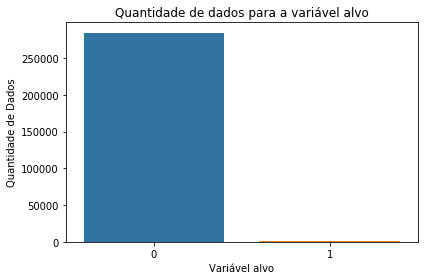

In [5]:
fig, ax=plt.subplots()

sns.countplot(x=df.Class)
ax.set_title('Quantidade de dados para a variável alvo')
ax.set_ylabel('Quantidade de Dados')
ax.set_xlabel('Variável alvo')

plt.tight_layout()

porcentagem = (df[df.Class == 1].shape[0] / df.shape[0])*100
print('Temos para transações legítimas um total de {} registros,\npara as transações fraudulentes temos um total de {}, assim a quantidade de registros de transações fraudulentas para o nosso dataset é de {:.4f}%.'.format(df.Class.value_counts()[0],df.Class.value_counts()[1],porcentagem))

Acima validamos que a quantidade de registros de transações fraudulentas no dataset é de 0.1727%, e com o gráfico podemos validar a discrepância entre as quantidades de dados entre as duas, com isso podemos definir que algo deverá ser feito para que o nosso modelo de Machine Learning consiga ter uma boa performance.

#### Qual a distribuição de valores para cada um da nossa variável alvo levando em consideração `Time` e `Amount`?

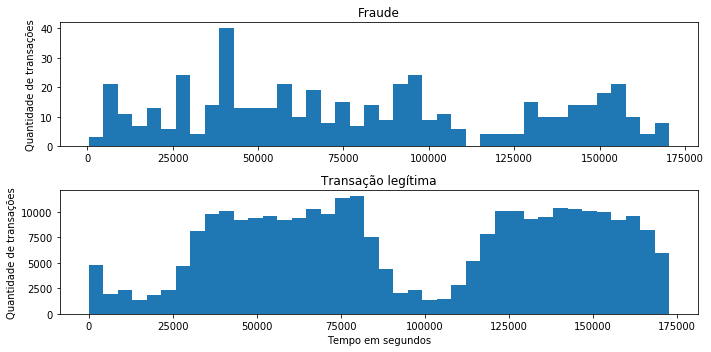

In [6]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,5))

ax[0].hist(df.Time[df.Class==1], bins = 40)
ax[0].set_title('Fraude')

ax[1].hist(df.Time[df.Class==0], bins = 40)
ax[1].set_title('Transação legítima')

ax[0].set_ylabel('Quantidade de transações')
ax[1].set_ylabel('Quantidade de transações')
plt.xlabel('Tempo em segundos')

plt.tight_layout()

Os gráficos acima mostram a evolução da distribuição das variáveis ao decorrer da variável `Time`, mas podemos ver que não há nada de alarmante que podemos verificar.

#### Existe valores outliers para as cada uma das labels da nossa variável alvo?

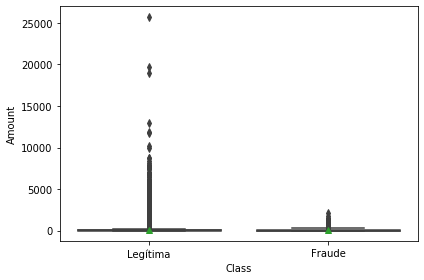

In [7]:
fig, ax = plt.subplots()

sns.boxplot(x=df.Class, y=df.Amount, showmeans=True, ax=ax)
plt.xticks([0, 1], ['Legítima', 'Fraude'])

plt.tight_layout()

Sabemos que com o gráfico BoxPlot podemos verificar diferenças no padrão dos ambos tipos de transações, mas o gráfico acima não fica muito nítido, como sabemos que a maioria das transações têm um valor menor, podemos melhorar o gráfico para a melhor visualização dos dados.

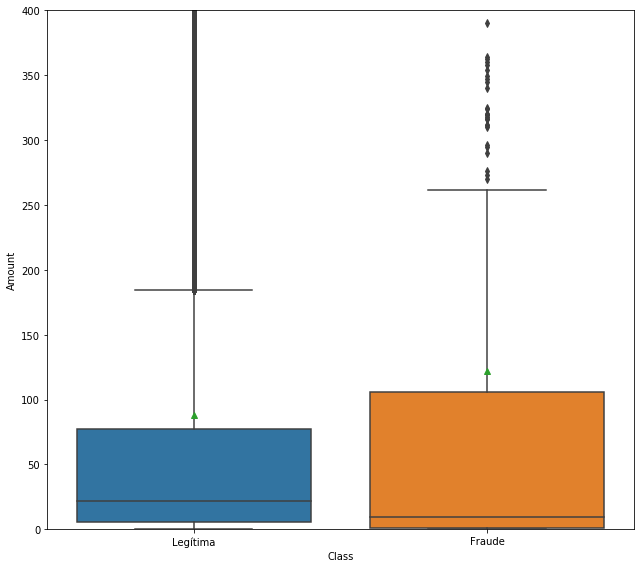

In [8]:
fig, ax = plt.subplots(figsize= (9,8))

sns.boxplot(x=df.Class, y=df.Amount, showmeans=True, ax=ax)
plt.xticks([0, 1], ['Legítima', 'Fraude'])
plt.ylim(0,400)

plt.tight_layout()

Agora sim, validamos que existe uma distribuição diferente entre os tipos de transações, o que pode ser um ponto forte para o algoritmo de ML.

#### Qual é a correlação das variáveis?

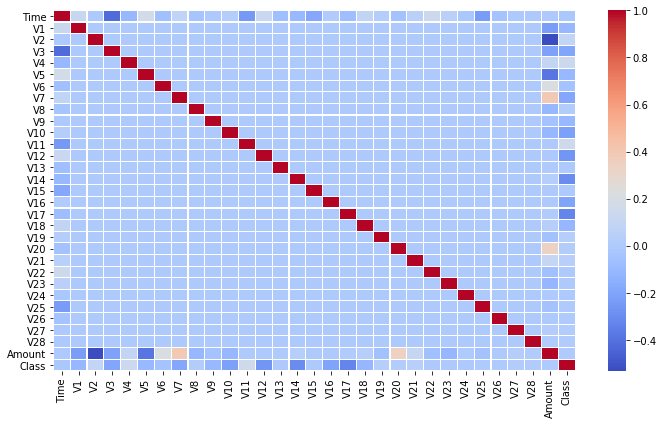

In [9]:
corr = df.corr()

fig, ax = plt.subplots(figsize = (10,6))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm")

plt.tight_layout()

O gráfico acima mostra as correlações entre as variáveis, mas vemos que não há muita informações úteis para validarmos, já que as variáveis passaram por uma transformação PCA e existe desbalanceamento dos dados.

### Resumo da Análise Exploratória dos Dados.

A análise foi feita afim de descobrir e extrair alguns padrões e observações, e alguma delas foram:

*   Não existe dados ausentes
*   A quantidade de registro da variável alvo está bastante desbalanceado, já que do total as transações fraudulentas representa apenas 0.17%.
*   Sabemos que os dados passaram por uma transformação PCA, assim essas variáveis passaram por padronização, será necessário padronizar as colunas `Amount` e `Time`.






## Preparação dos Dados

Nessa seção iremos fazer algumas validações e transformações do nosso dataset que antecede a aplicação do nossos algoritmos de ML, iremos fazer aqui:

* Normalização dos dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e teste
* Balancear o conjunto de dados

#### Padronização dos dados não normalizados

In [10]:
# padronizar as colunas Time e Amount
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


Acima fizemos a padronização das colunas `Amount` e `Time`, pois percebemos a diferença entre elas e as outras variáveis. Vimos que a variável `Amount` possui outliers, assim escolhemos a padronização por meio da StandardScaler.

O StandardScaler tem a seguinte ideia, ele transformará os dados de forma que a distribuição tenha a média igual a 0 e o desvio padrão igual a 1.

#### Dividir o dataset em train e test

In [0]:
X = df_clean.drop('Class', axis=1) # dados do df com variáveis padronizadas
y = df['Class'] # dados do nosso df original

X_train, X_teste, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

Antes de fazer transformações nos dados e também antes de aplicar o algoritmo de Machine Learning, devemos dividir o dataset em dataset de treino e de teste. O código acima faz exatamente isso, passamos que X receberá todo o nosso dataset padronizado, exceto a variável alvo `Class` e o nosso y receberá somente a variável alvo do dataset original, sem padronização, ela que queremos usar ML para fazer a previsão.

#### Balanceamento dos dados

1    369
0    369
dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


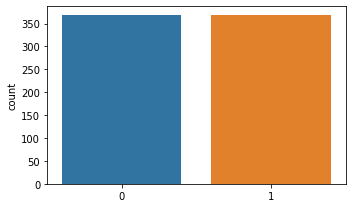

In [12]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição de classes
fig, ax = plt.subplots(figsize=(5,3))
sns.countplot(y_rus)
plt.tight_layout()

Acima fizemos o balanceamento dos dados, o método RandomUnderSampling foi usado, pois queremos preservar a variável minoritária, o 1. E com o gráfico validamos que o balanceamento está feito.

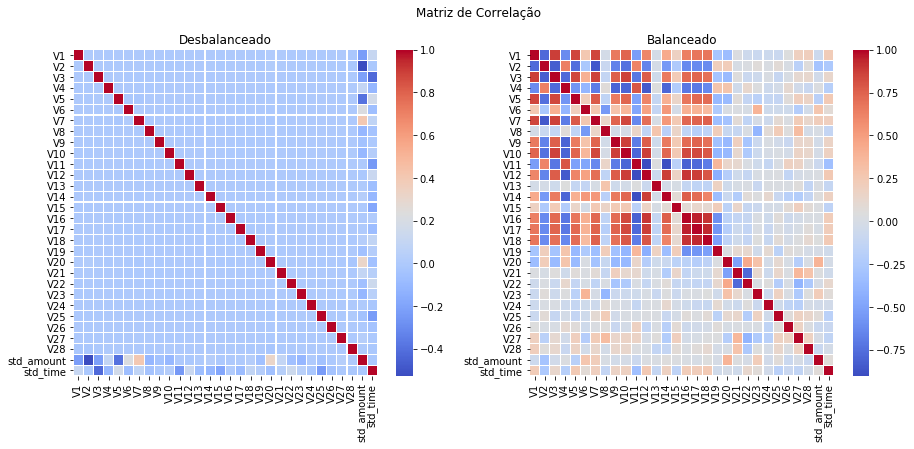

In [13]:
# plotar a matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,6))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

Anteriormente fizemos a correlação das variáveis com dados sem balanceamento, e vimos que nenhuma informação útil foi extraída, mas já com os dados balanceados temos outra interpretação. Podemos identicar quais variáveis que estão fortementes correlacionadas de forma bem clara.

## Modelos de Machine Learning

Após as considerações acima, essa seção é referente a aplicação dos algoritmos de ML, aqui iremos:

* Construir mais de um modelo de classificação para avaliar os desempenhos, sendo eles a Regressão Logística e Árvore de Decisão.

In [0]:
# nessa parte estamos instanciando a classe da Regressão Logística e treinando o modelo com os dados balanceados
model1 = LogisticRegression()
model1.fit(X_rus, y_rus)

# após o treino é feito as previsões em cima dos dados de teste
y_pred = model1.predict(X_teste)
y_proba = model1.predict_proba(X_teste)

In [0]:
# nessa parte estamos instanciando a classe da Árvore de Decisão e treinando o modelo com os dados balanceados
model2 = DecisionTreeClassifier(max_depth=4, criterion='entropy')
model2.fit(X_rus, y_rus)

# após o treino é feito as previsões em cima dos dados de teste
y_pred2 = model2.predict(X_teste)

Treinamos dois modelos diferentes de classificação para vermos qual melhor tem o desempenho. Usamos os dados já preparados e usamos os dados balanceados, já que identificamos a necessidade e foi feito a previsão com os dados originais de teste. 

Agora vamos avaliar o desempenho dos modelos.

## Avaliar o desempenho do modelo

Nesta seção vamos fazer a comparação dos modelos aplicados acima, mas antes vamos escolher algumas métricas para cada modelo, assim vamos:

* Identificar a melhor métrica para esse tipo de modelo
* Comparar o desempenho entre os modelos

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9671    0.9832     71079
           1     0.0453    0.9024    0.0862       123

    accuracy                         0.9669     71202
   macro avg     0.5225    0.9347    0.5347     71202
weighted avg     0.9982    0.9669    0.9816     71202

Acurácia: 0.9669

AUC: 0.9347



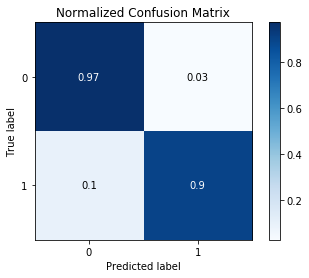

In [16]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Para o modelo de Regressão Logística temos que, como os dados são desbalanceados somente a acurácia não é uma boa forma de identificar performance, devemos levar em conta também a matriz de confução e os resultados para a coluna recall, que á as tentativas de responder a questão de qual foi a proporção dos positivos foram identificados corretamente. E além disso, a matriz de confusão nós trás informações mais relevantes, onde o nosso modelo teve 93% de acerto para transações fraudulentas.

A área sob a curva AUC ROC foi de 95%, antes de explicar AUC é necessário entender a curva ROC mostra o quão bom o modelo pode diferenciar entre transação legítima e a transação fraudulenta, assim o AUC é uma forma mais simples da curva ROC, que é a agregação dos resultados da ROC que é calculado a área sob a curva. O quanto maior o valor da AUC é melhor.

In [17]:
print("\nAccuracy Score do DecisionTree:")
print (accuracy_score(y_test, y_pred2))


Accuracy Score do DecisionTree:
0.932164826830707


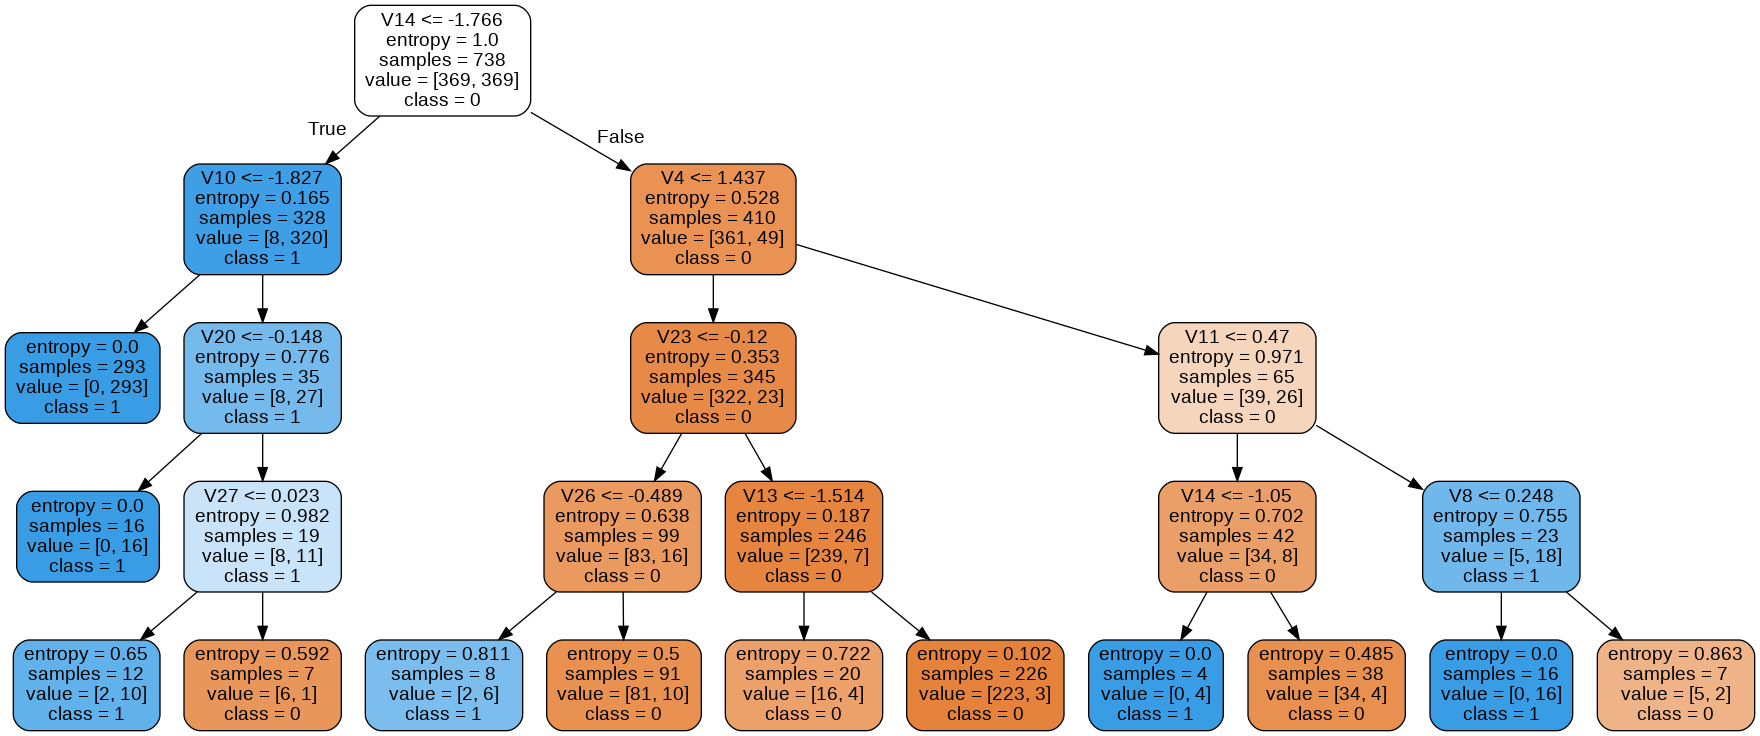

In [18]:
# importar bibliotecas
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# criar DOT 
dot = export_graphviz(model2, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['0', '1'])

# plotar
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

Um ponto positivo para o modelo de DecisionTree é que conseguimos entender e interpretar cada nódulo que o modelo escolheu, podemos então ver a nossa acurácia e erros de cada um e como as saídas estão sendo influenciadas pelos valores da nossa feature, a imagem acima mostra exatamente isso. Podemos verificar também pela acurácia do modelo, onde tivemos 96% de acurácia com os dados balanceados.

## Conclusão

O nosso dataset teve que passar por algumas transformações necessárias para a aplicação dos algoritmos de ML, mesmo ele já estar limpo e sem valores ausentes,foi necessário pois variáveis estavam padronizadas e outras não e existia o desbalanceamento da variável alvo.

Os dois algoritmos de ML que foram aplicados pode passar pelo processo de otimização (tunning) para que possamos alcaçar melhores performances, esse procedimento está relacionado a escolha dos valores dos parâmetros e inclusão de novos parâmetros, fica aqui um processo para o futuro.